In [40]:
import pandas as pd
import matplotlib.pyplot as plt


In [30]:
dataset_name = 'assistments17'
assert dataset_name in {'assistments17', 'ednet_small'}
dataset_train = pd.read_csv('./data/{}/'.format(dataset_name) + 'preprocessed_data_train.csv', sep="\t")
dataset_test = pd.read_csv('./data/{}/'.format(dataset_name) + 'preprocessed_data_test.csv', sep="\t")
dataset_total = pd.concat([dataset_train, dataset_test], axis=0)
dataset = dataset_total
summary_dict = {}
dist_dict = {}

In [31]:
# First-order Group Analysis
for groupby in ['user_id', 'item_id', 'skill_id', ['user_id', 'item_id'], ['user_id', 'skill_id'], ['skill_id', 'item_id']]:
    group_key = groupby.replace('_id', '') if isinstance(groupby, str) else '({},{})'.format(groupby[0].replace('_id', ''), groupby[1].replace('_id', ''))
    per_key_distribution = dataset.groupby(by=groupby).apply(len)
    dist_dict[group_key] = per_key_distribution
    if isinstance(groupby, list):
        per_key_distribution = per_key_distribution.unstack(0).fillna(0).stack(0)
    dist_stat = per_key_distribution.describe()
    dist_stat.loc['density'] = len(per_key_distribution.loc[per_key_distribution > 0])/len(per_key_distribution)
    summary_dict['#{}_stat'.format(group_key)] = dist_stat
    if dist_stat['density'] < 1:
        summary_dict['#{}_nonzero_stat'.format(group_key)] = dataset.groupby(by=groupby).apply(len).describe()



In [32]:
stat_keys = [key for key in summary_dict.keys() if key.endswith('_stat')]
rename_keys = [key.replace('#', '# data per ').replace('_stat', '') for key in stat_keys]
summary_table = pd.concat([summary_dict[key] for key in stat_keys], axis=1, \
    keys=rename_keys).T.round(1)
summary_table.columns = ['unique count', 'avg', 'std', '0%(min)', '25%', '50%(med)', '75%', '100%(max)', 'matrix density']
print(summary_table)

                                 unique count     avg     std  0%(min)    25%  \
# data per user                        1708.0   547.2   413.4     11.0  236.0   
# data per item                        3162.0   295.6   394.7      1.0   15.0   
# data per skill                        411.0  2274.1  4952.0      2.0  471.5   
# data per (user,item)              5400696.0     0.2     0.9      0.0    0.0   
# data per (user,item)_nonzero       389820.0     2.4     2.5      1.0    1.0   
# data per (user,skill)              701988.0     1.3     5.7      0.0    0.0   
# data per (user,skill)_nonzero      156196.0     6.0    10.8      1.0    1.0   
# data per (skill,item)             1299582.0     0.7    24.3      0.0    0.0   
# data per (skill,item)_nonzero        3162.0   295.6   394.7      1.0   15.0   

                                 50%(med)     75%  100%(max)  matrix density  
# data per user                     439.5   736.0     3030.0             1.0  
# data per item                

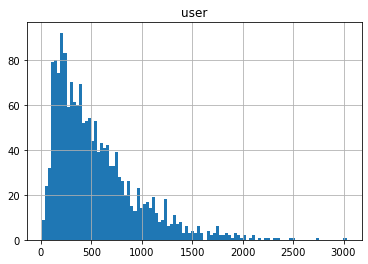

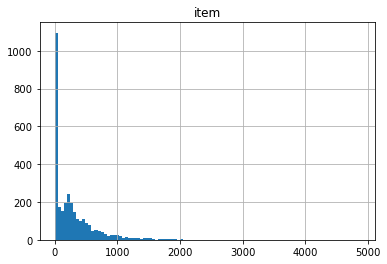

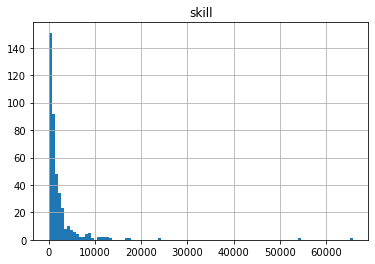

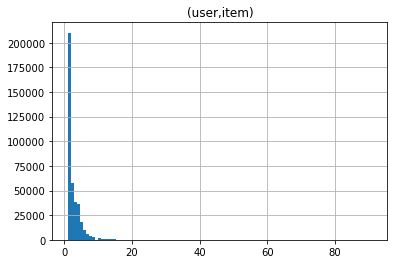

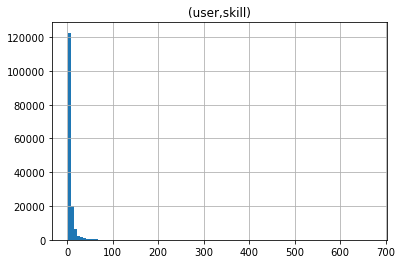

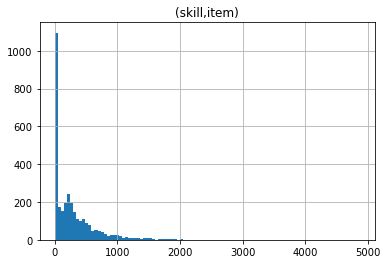

In [48]:
for dist_key, dist in dist_dict.items():
    plt.figure()
    dist.reset_index(drop=True).hist(bins=100)
    plt.title(dist_key)
    
